In [24]:
from urllib import request
import re, datetime, time 

from pytesseract import image_to_string
from PIL import Image, ImageDraw, ImageOps
from IPython.core.display import Image as Img, display

urlSSO = 'https://webapp.yuntech.edu.tw/YunTechSSO/Account/Login?lang=zh-TW'
urlCaptcha = 'https://webapp.yuntech.edu.tw/YunTechSSO/ImageValidationHandler.ashx?_dc='
    
def randomCodeOcr(img):
    #使用ImageEnhance可以增强图片的识别率
    #enhancer = ImageEnhance.Contrast(image)
    #enhancer = enhancer.enhance(4)
    #img = img.convert('L')
    ltext= image_to_string(img)
    return ltext

def getImage():
    timestamp = (int)(datetime.datetime.now().timestamp() * 1000)
    res = request.urlretrieve(urlCaptcha + str(timestamp), './ValidationCodes/%s.jpg' % str(timestamp))
    image = Image.open('./ValidationCodes/%s.jpg' % str(timestamp))
    display(image)
    imageInv = ImageOps.invert(image)
    return imageInv, str(timestamp)
    ##return randomCodeOcr(image)

In [25]:
def getPixel(image,x,y,G,N):  
    L = image.getpixel((x,y))  
    if L > G:  
        L = True  
    else:  
        L = False  
  
    nearDots = 0  
    if L == (image.getpixel((x - 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y + 1)) > G):  
        nearDots += 1  
  
    if nearDots < N:  
        return image.getpixel((x,y-1))  
    else:  
        return None  

In [28]:
def clearNoise(image, G, N, Z):  
    draw = ImageDraw.Draw(image)  
  
    for i in range(0,Z):  
        for x in range(1,image.size[0] - 1):  
            for y in range(1,image.size[1] - 1):  
                color = getPixel(image,x,y,G,N)  
                if color != None:  
                    draw.point((x,y),color)  

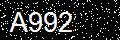

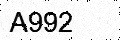

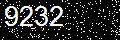

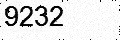

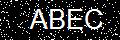

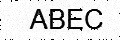

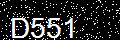

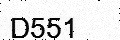

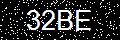

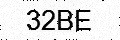

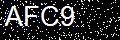

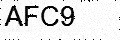

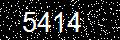

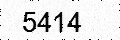

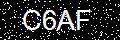

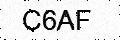

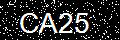

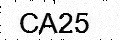

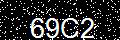

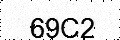

In [30]:
for each in range(10):
    image, timestamp = getImage()
    image = image.convert('L')
    clearNoise(image, 100, 3, 3) 
    display(image)
    image.save('./TIFF/%s.tif' % str(timestamp), 'tiff')
    time.sleep(1)